# Project 01 - Classify the 10 digits using MNIST data

You are required to implement the convolutional neural network using purely numpy to classify the digits. All the techniques and codes will be covered in the next 2 weeks.

## Due date

March 31th, 2024

## Tasks
The project include two tasks:
### 1. task one: Use the image data (vector) as input, and use Deep feed forward netork to train and predict the labels.
### 2. task two: Reshape the image data to 2D array and use it as input, and use convolution neural network to train and predict the labels

## Extra Credits
If you want to speed up the training using GPU, you will need to write C++ code and wrap it using pybind11 and call it in your python code. This will give you 10 extra credits for this project.

## Rubics
1. If you code can run at my side and include the basic training cycle, you will get 40% of the total score;
2. Your implementation of fully connected layers (forward and backpropagation pass) ----- 20%;
3. Your implementation of Convolution layer (forward and backpropagation pass) ----- 20%
4. Complete two tasks ----- 20%

## Data Description
[MNIST](https://en.wikipedia.org/wiki/MNIST_database)

In [6]:
# load the mnist data
from sklearn.datasets import fetch_openml

In [7]:
mnist_28 = fetch_openml('mnist_784')

C:\Users\ALEKHYA\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [8]:
mnist_28_img= mnist_28.data.to_numpy()

In [9]:
mnist_28_img.shape

(70000, 784)

In [10]:
mnist_28_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
#display one image
import matplotlib.pyplot as plt
import numpy as np

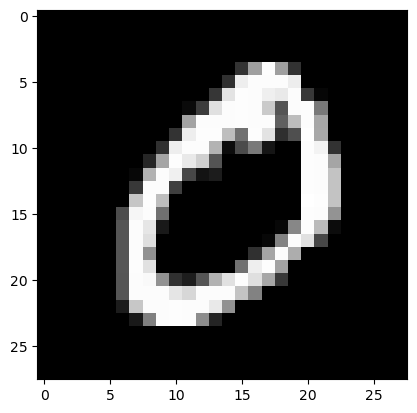

In [12]:
plt.imshow((mnist_28_img[1].reshape(28,28)), cmap=plt.cm.gray)

In [13]:
y = mnist_28.target

In [14]:
y.shape

(70000,)

In [15]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## Task - 1

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X = mnist_28_img / 255.0
y = np.array(y.astype(int)) 

#Converting labels to one-hot encoding
encoder = OneHotEncoder(sparse=False)
y = y.reshape(-1, 1)
y_encoded = encoder.fit_transform(y)

#Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\ALEKHYA\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((56000, 784), (14000, 784), (56000, 10), (14000, 10))

In [17]:

def relu(x):
    """ReLU (Rectified Linear Unit) activation function."""
    return np.maximum(0, x)

def relu_deriv(x):
    """Derivative of the ReLU (Rectified Linear Unit) activation function."""
    return (x > 0).astype(x.dtype)

def softmax(x):
    """Softmax activation function."""
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

In [18]:
def initialize_parameters(input_size, hidden_size, output_size):
    """Initialize parameters for a neural network."""
    np.random.seed(42)  #For reproducibility
    Wh = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)  # Initialize weights for hidden layer
    bh = np.zeros((1, hidden_size))                                           # Initialize bias for hidden layer
    Wo = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)# Initialize weights for output layer
    bo = np.zeros((1, output_size))                                           # Initialize bias for output layer
    return Wh, bh, Wo, bo

In [19]:
def forward_pass(X, Wh, bh, Wo, bo):
    """Perform forward pass through a neural network."""
    # Hidden layer
    inputHidden = np.dot(X, Wh) + bh                     # Calculate input to hidden layer
    outputHidden = relu(inputHidden)                     # Apply ReLU activation to hidden layer output
    # Output layer
    inputForOutputLayer = np.dot(outputHidden, Wo) + bo  # Calculate input to output layer
    output = softmax(inputForOutputLayer)                 # Apply softmax activation to output layer
    return inputHidden, outputHidden, inputForOutputLayer, output


In [20]:
def compute_loss(Y, Y_hat):
    """Compute the cross-entropy loss."""
    m = Y.shape[0]                                                          # Number of samples
    return -np.mean(np.log(Y_hat[np.arange(m), Y.argmax(axis=1)] + 1e-9))    # Calculate cross-entropy loss


In [21]:
def backprop(X, Y, inputHidden, outputHidden, inputForOutputLayer, output, Wh, bh, Wo, bo):
    """Perform backpropagation to compute gradients."""
    m = Y.shape[0]
    # Output layer error
    error_output_layer = output - Y                                                  # Calculate error at output layer
    changes_output = np.dot(outputHidden.T, error_output_layer) / m                  # Compute gradients for weights in output layer
    changes_output_bias = np.sum(error_output_layer, axis=0, keepdims=True) / m      # Compute gradients for biases in output layer
    # Hidden layer error
    error_hidden_layer = np.dot(error_output_layer, Wo.T) * relu_deriv(inputHidden)  # Calculate error at hidden layer
    changes_hidden = np.dot(X.T, error_hidden_layer) / m                             # Compute gradients for weights in hidden layer
    changes_hidden_bias = np.sum(error_hidden_layer, axis=0, keepdims=True) / m      # Compute gradients for biases in hidden layer
    
    return changes_hidden, changes_hidden_bias, changes_output, changes_output_bias


In [22]:
def update_parameters(Wh, bh, Wo, bo, changes_hidden, changes_hidden_bias, changes_output, changes_output_bias, learning_rate):
    """Update parameters using gradient descent."""
    # Update weights and biases in hidden layer
    Wh -= learning_rate * changes_hidden
    bh -= learning_rate * changes_hidden_bias
    # Update weights and biases in output layer
    Wo -= learning_rate * changes_output
    bo -= learning_rate * changes_output_bias
    return Wh, bh, Wo, bo


In [23]:
def train(X_train, Y_train, X_test, Y_test, hidden_size, learning_rate, epochs):
    """Train the neural network model."""
    input_size, output_size = X_train.shape[1], Y_train.shape[1]                  # Get input and output sizes
    
    # Initialize parameters
    Wh, bh, Wo, bo = initialize_parameters(input_size, hidden_size, output_size)

     # Training loop
    for epoch in range(epochs):
        # Forward pass
        inputHidden, outputHidden, inputForOutputLayer, output = forward_pass(X_train, Wh, bh, Wo, bo)
        # Compute loss
        loss = compute_loss(Y_train, output)
        # Backpropagation
        changes_hidden, changes_hidden_bias, changes_output, changes_output_bias = backprop(X_train, Y_train, inputHidden, outputHidden, inputForOutputLayer, output, Wh, bh, Wo, bo)
        # Update parameters
        Wh, bh, Wo, bo = update_parameters(Wh, bh, Wo, bo, changes_hidden, changes_hidden_bias, changes_output, changes_output_bias, learning_rate)
        
        # Print loss every 5 epochs
        if epoch % 5 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, loss: {loss}")
            
    # Evaluation
    _, _, _, A2_train = forward_pass(X_train, Wh, bh, Wo, bo)
    train_accuracy = np.mean(np.argmax(A2_train, axis=1) == np.argmax(Y_train, axis=1))
    print(f"Training accuracy: {train_accuracy * 100:.2f}%")
    
    _, _, _, A2_test = forward_pass(X_test, Wh, bh, Wo, bo)
    test_accuracy = np.mean(np.argmax(A2_test, axis=1) == np.argmax(Y_test, axis=1))
    print(f"Test accuracy: {test_accuracy * 100:.2f}%")


In [24]:
hidden_size = 256
learning_rate = 0.1
epochs = 50
train(X_train, y_train, X_test, y_test, hidden_size, learning_rate, epochs)

Epoch 0, loss: 2.4696983843981926
Epoch 5, loss: 1.8659091303471023
Epoch 10, loss: 1.4840461864920003
Epoch 15, loss: 1.2101790493611508
Epoch 20, loss: 1.0227734130045845
Epoch 25, loss: 0.8938405372763555
Epoch 30, loss: 0.8019055824967123
Epoch 35, loss: 0.7337266502374247
Epoch 40, loss: 0.6812886236015083
Epoch 45, loss: 0.6397244557690626
Epoch 49, loss: 0.6121932524302102
Training accuracy: 85.63%
Test accuracy: 85.86%


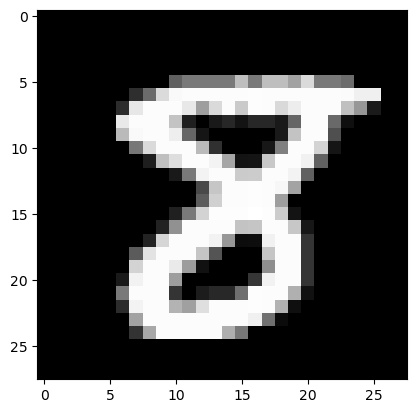

In [25]:
plt.imshow((X_test[0].reshape(28,28)), cmap=plt.cm.gray)

## Task - 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Splitting the dataset into training and testing labels
train_images = X_train
train_labels = y_train
test_images = X_test
test_labels = y_test



In [2]:
class Convolution:
    """Initialize the convolutional layer."""
    def __init__(self, num_filters, filter_size):
        self.num_filters = num_filters            # Number of filters
        self.filter_size = filter_size             # Size of each filter
        # Initialize filters with random values
        self.filters = np.random.randn(num_filters, filter_size, filter_size) / (filter_size * filter_size)

    def iterate_regions(self, image):
        """Iterate over all possible regions of the input image."""
        h, w = image.shape                       # Height and width of the input image

        for i in range(h - self.filter_size + 1):
            for j in range(w - self.filter_size + 1):
                region = image[i:(i + self.filter_size), j:(j + self.filter_size)]  # Extract region of interest
                yield region, i, j

    def forward(self, input):
        """Perform forward pass through the convolutional layer."""
        self.last_input = input              # Save input for backpropagation
        h, w = input.shape                   # Height and width of the input
        
        # Initialize output array
        output = np.zeros((h - self.filter_size + 1, w - self.filter_size + 1, self.num_filters))
        # Iterate over each region of the input
        for region, i, j in self.iterate_regions(input):
            # Perform convolution and sum the results
            output[i, j] = np.sum(region * self.filters, axis=(1, 2))

        return output

    def backprop(self, d_L_d_out, learn_rate):
        """Perform backpropagation through the convolutional layer."""
        d_L_d_filters = np.zeros(self.filters.shape)

        for region, i, j in self.iterate_regions(self.last_input):
            # Update gradients for each filter
            for f in range(self.num_filters):
                d_L_d_filters[f] += d_L_d_out[i, j, f] * region
        
        # Update filters using the gradients
        self.filters -= learn_rate * d_L_d_filters
        return None



In [3]:
class MaxPool:
    def iterate_regions(self, image):
        # Define the generator to iterate over regions of the input image
        h, w, _ = image.shape
        new_h = h // 2
        new_w = w // 2

        for i in range(new_h):
            for j in range(new_w):
                # Extract the region of interest
                region = image[(i * 2):(i * 2 + 2), (j * 2):(j * 2 + 2)]
                yield region, i, j

    def forward(self, input):
        # Perform forward pass through the max-pooling layer
        self.last_input = input
        h, w, num_filters = input.shape
        output = np.zeros((h // 2, w // 2, num_filters))

        for region, i, j in self.iterate_regions(input):
            # Find the maximum value in each region and store it in the output
            output[i, j] = np.amax(region, axis=(0, 1))

        return output

    def backprop(self, d_L_d_out):
        # Perform backpropagation through the max-pooling layer
        d_L_d_input = np.zeros(self.last_input.shape)

        for region, i, j in self.iterate_regions(self.last_input):
            # Find the maximum value in each region
            h, w, f = region.shape
            amax = np.amax(region, axis=(0, 1))

            for i2 in range(h):
                for j2 in range(w):
                    for f2 in range(f):
                        # Assign the gradient to the corresponding input value
                        if region[i2, j2, f2] == amax[f2]:
                            d_L_d_input[i * 2 + i2, j * 2 + j2, f2] = d_L_d_out[i, j, f2]

        return d_L_d_input



In [4]:
class Softmax:
    def __init__(self, input_len, nodes):
        # Initialize weights and biases
        self.weights = np.random.randn(input_len, nodes) / input_len
        self.biases = np.zeros(nodes)

    def forward(self, input):
        # Perform forward pass through the softmax layer
        self.last_input_shape = input.shape
        input = input.flatten()            # Flatten input
        self.last_input = input
        input_len, nodes = self.weights.shape

        # Calculate scores
        totals = np.dot(input, self.weights) + self.biases
        self.last_totals = totals

        # Calculate probabilities using softmax function
        exp = np.exp(totals)
        return exp / np.sum(exp, axis=0)

    def backprop(self, d_L_d_out, learn_rate):
        # Perform backpropagation through the softmax layer
        for i, gradient in enumerate(d_L_d_out):
            if gradient == 0:
                continue

            t_exp = np.exp(self.last_totals)
            S = np.sum(t_exp)

            # Calculate derivative of softmax function
            d_out_d_t = -t_exp[i] * t_exp / (S ** 2)
            d_out_d_t[i] = t_exp[i] * (S - t_exp[i]) / (S ** 2)

            # Compute gradients
            d_t_d_w = self.last_input
            d_t_d_b = 1
            d_t_d_inputs = self.weights

            d_L_d_t = gradient * d_out_d_t

            d_L_d_w = d_t_d_w[np.newaxis].T @ d_L_d_t[np.newaxis]
            d_L_d_b = d_L_d_t * d_t_d_b
            d_L_d_inputs = d_t_d_inputs @ d_L_d_t

            # Update weights and biases using gradients
            self.weights -= learn_rate * d_L_d_w
            self.biases -= learn_rate * d_L_d_b

            # Reshape gradients to match input shape
            return d_L_d_inputs.reshape(self.last_input_shape)

conv = Convolution(8, 3)        # Initialize convolutional layer with 8 filters of size 3x3
pool = MaxPool()                # Initialize max pooling layer
softmax = Softmax(13 * 13 * 8, 10)  # Initialize softmax layer with input size 13x13x8 and output size 10


def forward(image, label):
    # Perform forward pass through the neural network
    out = conv.forward((image / 255) - 0.5)        # Normalize image and pass through convolutional layer
    out = pool.forward(out)                        # Pass through max pooling layer
    out = softmax.forward(out)                     # Pass through softmax layer

    # Compute loss and accuracy
    loss = -np.log(out[label])
    acc = 1 if np.argmax(out) == label else 0

    return out, loss, acc

def train(image, label, learn_rate=0.005):
    # Perform training for a single image-label pair
    out, loss, acc = forward(image, label)           # Forward pass

    # Compute gradient for softmax layer
    gradient = np.zeros(10)
    gradient[label] = -1 / out[label]

    grad_back = softmax.backprop(gradient, learn_rate)   # Backpropagate through softmax layer
    grad_back = pool.backprop(grad_back)                 # Backpropagate through max pooling layer
    grad_back = conv.backprop(grad_back, learn_rate)     # Backpropagate through convolutional layer

    return loss, acc

In [5]:


for epoch in range(1):
    print('Epoch:', epoch + 1)

    # Shuffle training data
    shuffle_data = np.random.permutation(len(train_images))
    train_images = train_images[shuffle_data]
    train_labels = train_labels[shuffle_data]

    loss = 0
    num_correct = 0
    
    # Training loop
    for i, (im, label) in enumerate(zip(train_images, train_labels)):
        if i % 10000 == 0 and i > 0:  # Change to 10000 for less frequent logging
            print(f"Step: {i}, Average_loss: {loss / i:.5f}, Accuracy: {num_correct / i * 100:.2f}%")
            # Resetting loss and num_correct after logging is removed to calculate cumulative metrics

        # Perform training for a single image-label pair
        l1, accu = train(im, label)
        loss += l1
        num_correct += accu

    # Print final epoch metrics
    print(f"Final Epoch Metrics - Average_loss: {loss / len(train_images):.5f}, Accuracy: {num_correct / len(train_images) * 100:.2f}%")

test_loss = 0
test_correct = 0

# Evaluate on test data
for im, label in zip(test_images, test_labels):
    _, l1, accu = forward(im, label)
    test_loss += l1
    test_correct += accu

print('Test loss:', test_loss / len(test_images))
print('Test Accuracy:', test_correct / len(test_images) * 100, '%')


Epoch: 1
Step: 10000, Average_loss: 0.47701, Accuracy: 84.88%
Step: 20000, Average_loss: 0.38155, Accuracy: 88.15%
Step: 30000, Average_loss: 0.33288, Accuracy: 89.77%
Step: 40000, Average_loss: 0.30575, Accuracy: 90.67%
Step: 50000, Average_loss: 0.28448, Accuracy: 91.38%
Final Epoch Metrics - Average_loss: 0.26720, Accuracy: 91.91%
Test loss: 0.17184600461953162
Test Accuracy: 94.83 %


## Conclusion

Fully Connected Network provided a accuracy and loss of **85.86%** and **0.61** for 50 epochs respectively,

Convolution Neural Network provided a validation accuracy and loss score of **94.83%** and **0.17** for 5 steps in 1 epoch respectively.